Author: Maha Alali

# Housing Renovations Analysis in Boston - Updated for 2020 Specifically looking to Res Units


This notebook presents an analysis of housing renovations in Boston. The objective is to identify areas that have lost/gained/ had no change in the  number of Res Units after a renovation, similar to the notebook in the midsemester report but updating the map for 2020.

Step 1: Load res_units cleaned data.

In [2]:
import pandas as pd

res_units_renovation_comparison = pd.read_csv('../Cleaned Res Units Data/res_units_renovation_comparison.csv')

display(res_units_renovation_comparison)

,PID,REMODEL_YEAR,RES_UNITS_change,latitude,longitude
0,100006000,2018.0,0.0,-71.032231,42.379499
1,100006000,2018.0,0.0,-71.032231,42.379499
2,100006000,2018.0,0.0,-71.032231,42.379499
3,100006000,2018.0,0.0,-71.032231,42.379499
4,100006000,2018.0,0.0,-71.032215,42.379507
...,...,...,...,...,...
79898,2205637000,2015.0,0.0,-71.164208,42.346264
79899,2205637000,2015.0,0.0,-71.164208,42.346264
79900,2205637000,2015.0,0.0,-71.164208,42.346264
79901,2205650000,2017.0,0.0,-71.163238,42.345648


Step 2: Load the GeoJSON file to understand the structure of the neighborhood boundaries data.

In [3]:
import geopandas as gpd

# Replace the path with the path to your Shapefile
neighborhoods_gdf = gpd.read_file('../data/Census2020_BG_Neighborhoods/Census2020_BG_Neighborhoods.shp')


In [4]:
# Display the first few rows to verify the structure
display(neighborhoods_gdf)

,OBJECTID,BlockGr202,Shape_Leng,Shape_Area,geometry
0,1,Allston,35808.619278,4.154760e+07,"POLYGON ((758525.831 2959265.091, 758671.805 2..."
1,2,Back Bay,18815.103609,1.538724e+07,"POLYGON ((771539.219 2954877.239, 771575.861 2..."
2,3,Beacon Hill,11668.951169,7.891524e+06,"POLYGON ((774297.440 2956963.715, 774312.270 2..."
3,4,Brighton,47051.804654,7.658156e+07,"POLYGON ((754177.850 2955969.986, 754151.917 2..."
4,5,Charlestown,33910.754786,5.127021e+07,"POLYGON ((773132.501 2968902.714, 773021.919 2..."
5,6,Chinatown,10843.828683,3.436019e+06,"POLYGON ((775639.044 2953734.864, 775595.372 2..."
6,7,Dorchester,80692.139164,2.193038e+08,"POLYGON ((775867.212 2944875.352, 775903.995 2..."
7,8,Downtown,32767.370822,2.159010e+07,"MULTIPOLYGON (((773867.690 2953737.779, 773824..."
8,9,East Boston,79266.383121,1.948618e+08,"POLYGON ((790588.304 2971526.017, 790707.690 2..."
9,10,Fenway,101396.628071,4.281357e+07,"POLYGON ((756955.208 2961112.383, 757042.651 2..."


Step 3: Create GeoDataFrame

In [5]:
from shapely.geometry import Point

res_units_renovation_comparison['geometry'] = res_units_renovation_comparison.apply(
    lambda row: Point(float(row['latitude']), float(row['longitude'])),
    axis=1
)


In [6]:
# Create GeoDataFrame for res_units_renovation_comparison
res_units_geo = gpd.GeoDataFrame(res_units_renovation_comparison, geometry='geometry')

# Ensure both GeoDataFrames use the same CRS
res_units_geo = res_units_geo.set_crs("EPSG:4326")
neighborhoods_gdf = neighborhoods_gdf.to_crs("EPSG:4326")

Lets see where the res_unit are.

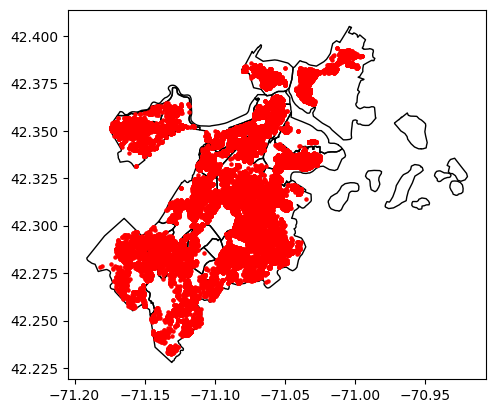

In [7]:
import matplotlib.pyplot as plt

ax = neighborhoods_gdf.plot(edgecolor='k', facecolor='none')
res_units_geo.plot(ax=ax, color='red', markersize=5)

plt.show()

Step 4: Perform Spatial Join

In [8]:
# Perform the spatial join
properties_with_neighborhoods = gpd.sjoin(res_units_geo, neighborhoods_gdf, how='inner', predicate='intersects')

# Display the result
display(properties_with_neighborhoods)

,PID,REMODEL_YEAR,RES_UNITS_change,latitude,longitude,geometry,index_right,OBJECTID,BlockGr202,Shape_Leng,Shape_Area
0,100006000,2018.0,0.0,-71.032231,42.379499,POINT (-71.03223 42.37950),8,9,East Boston,79266.383121,1.948618e+08
1,100006000,2018.0,0.0,-71.032231,42.379499,POINT (-71.03223 42.37950),8,9,East Boston,79266.383121,1.948618e+08
2,100006000,2018.0,0.0,-71.032231,42.379499,POINT (-71.03223 42.37950),8,9,East Boston,79266.383121,1.948618e+08
3,100006000,2018.0,0.0,-71.032231,42.379499,POINT (-71.03223 42.37950),8,9,East Boston,79266.383121,1.948618e+08
4,100006000,2018.0,0.0,-71.032215,42.379507,POINT (-71.03221 42.37951),8,9,East Boston,79266.383121,1.948618e+08
...,...,...,...,...,...,...,...,...,...,...,...
79898,2205637000,2015.0,0.0,-71.164208,42.346264,POINT (-71.16421 42.34626),3,4,Brighton,47051.804654,7.658156e+07
79899,2205637000,2015.0,0.0,-71.164208,42.346264,POINT (-71.16421 42.34626),3,4,Brighton,47051.804654,7.658156e+07
79900,2205637000,2015.0,0.0,-71.164208,42.346264,POINT (-71.16421 42.34626),3,4,Brighton,47051.804654,7.658156e+07
79901,2205650000,2017.0,0.0,-71.163238,42.345648,POINT (-71.16324 42.34565),3,4,Brighton,47051.804654,7.658156e+07


Step 5: Aggregate res_units gained/lost per neighborhood.

In [9]:
# Aggregate residential unit differences by neighborhood
total_res_units_change_by_neighborhood = properties_with_neighborhoods.groupby('BlockGr202')['RES_UNITS_change'].sum().reset_index()

# Count how many points fall within each neighborhood
point_counts = gpd.sjoin(neighborhoods_gdf, res_units_geo, how='left', predicate='intersects').groupby('BlockGr202').size()

# Merge the point counts with the neighborhoods to see which ones have zero counts
neighborhoods_gdf = neighborhoods_gdf.merge(point_counts.rename('point_count'), left_on='BlockGr202', right_index=True, how='left')

# Replace NaNs with zero to reflect that there are no points in those neighborhoods
neighborhoods_gdf['point_count'] = neighborhoods_gdf['point_count'].fillna(0)

# Merge the aggregated residential unit changes with the neighborhoods
neighborhoods_gdf = neighborhoods_gdf.merge(total_res_units_change_by_neighborhood, on='BlockGr202', how='left')

# Now you have a GeoDataFrame that includes neighborhoods along with the total change in residential units
display(neighborhoods_gdf)


,OBJECTID,BlockGr202,Shape_Leng,Shape_Area,geometry,point_count,RES_UNITS_change
0,1,Allston,35808.619278,4.154760e+07,"POLYGON ((-71.12123 42.36775, -71.12069 42.367...",2872,4.0
1,2,Back Bay,18815.103609,1.538724e+07,"POLYGON ((-71.07315 42.35554, -71.07302 42.355...",5839,-1134.0
2,3,Beacon Hill,11668.951169,7.891524e+06,"POLYGON ((-71.06291 42.36123, -71.06286 42.360...",3351,-557.0
3,4,Brighton,47051.804654,7.658156e+07,"POLYGON ((-71.13737 42.35876, -71.13747 42.358...",3561,-47058.0
4,5,Charlestown,33910.754786,5.127021e+07,"POLYGON ((-71.06700 42.39401, -71.06741 42.393...",2284,6027.0
5,6,Chinatown,10843.828683,3.436019e+06,"POLYGON ((-71.05801 42.35235, -71.05817 42.352...",1462,0.0
6,7,Dorchester,80692.139164,2.193038e+08,"POLYGON ((-71.05733 42.32804, -71.05720 42.328...",9846,1121.0
7,8,Downtown,32767.370822,2.159010e+07,"MULTIPOLYGON (((-71.06456 42.35238, -71.06472 ...",3127,1.0
8,9,East Boston,79266.383121,1.948618e+08,"POLYGON ((-71.00232 42.40094, -71.00188 42.400...",4129,881.0
9,10,Fenway,101396.628071,4.281357e+07,"POLYGON ((-71.12701 42.37284, -71.12669 42.372...",6324,-53.0


Step 6: Plot the data.

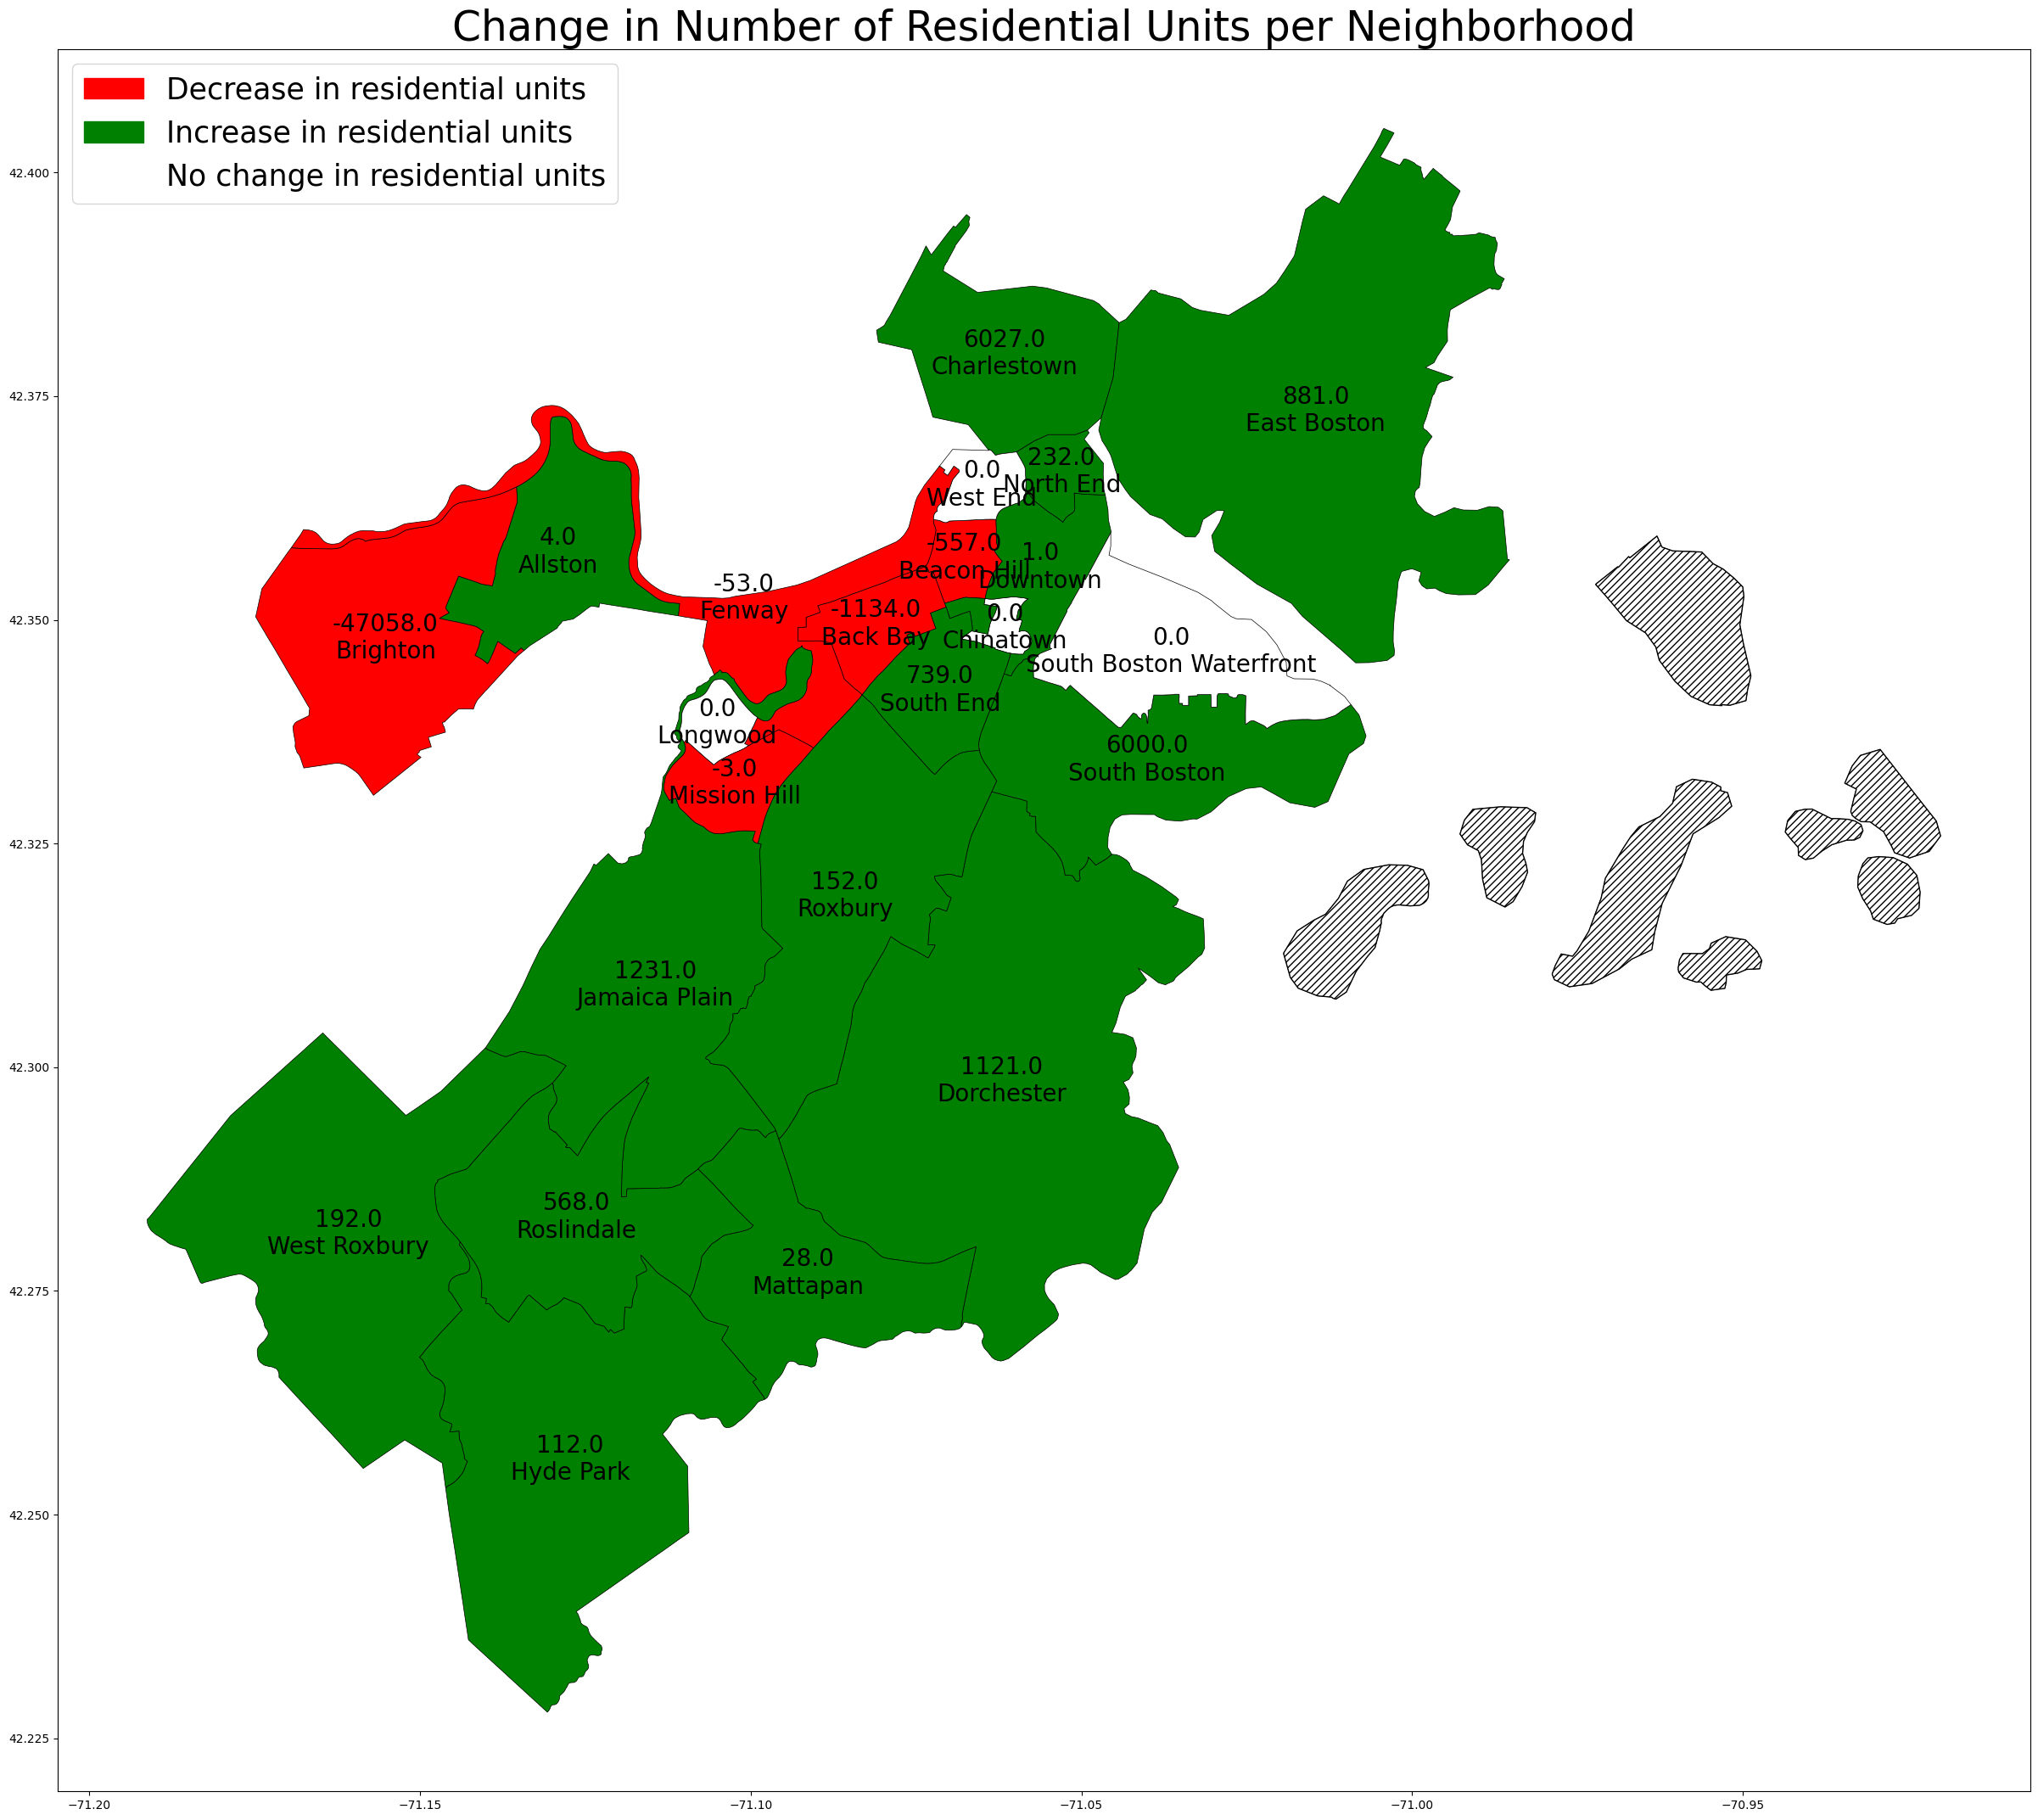

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Map res_units_diff to colors: red for increase, green for decrease/no change
neighborhoods_gdf['color'] = neighborhoods_gdf['RES_UNITS_change'].apply(lambda x: 'green' if x > 0 else 'red' if x < 0 else 'white')

fig, ax = plt.subplots(1, figsize=(30, 30))

# Plot using custom colors for increase, decrease, and no changes
neighborhoods_gdf.plot(ax=ax, color=neighborhoods_gdf['color'], edgecolor='black', linewidth=0.5)

# Add lines for areas with missing data (if any)
missing_data_areas = neighborhoods_gdf[neighborhoods_gdf['RES_UNITS_change'].isna()]
missing_data_areas.plot(ax=ax, color="white", hatch="////", edgecolor="black", linewidth=1)

# Custom legend
red_patch = mpatches.Patch(color='red', label='Decrease in residential units')
green_patch = mpatches.Patch(color='green', label='Increase in residential units')
white_patch = mpatches.Patch(color='white', label='No change in residential units')
plt.legend(handles=[red_patch, green_patch, white_patch], loc='upper left', fontsize=25)

# Annotations for res unit change and neighborhood name
for idx, row in neighborhoods_gdf.iterrows():
    if pd.notnull(row['RES_UNITS_change']):
        label = f"{row['RES_UNITS_change']}\n{row['BlockGr202']}"
        ax.annotate(label,
                    xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=20, color='black')

plt.title('Change in Number of Residential Units per Neighborhood', fontsize=35)
plt.show()


In [11]:
# Apply the conversion to WKT only for geometry objects
neighborhoods_gdf['geometry'] = neighborhoods_gdf['geometry'].apply(lambda geom: geom.wkt)

# Save to CSV
neighborhoods_gdf.to_csv('../Demographic Data/res_units_neighborhoods_gdf.csv', index=False)


/var/folders/m7/r7m7ht2j7jbfb00kv5p9d0q00000gn/T/ipykernel_72240/1577137998.py:2: UserWarning: Geometry column does not contain geometry.
  neighborhoods_gdf['geometry'] = neighborhoods_gdf['geometry'].apply(lambda geom: geom.wkt)
